In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

import warnings
warnings.filterwarnings('ignore')

### 1.Load the dataset and explore the variables.

In [2]:
data = pd.read_csv("customer_churn.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
# distribution of the target
data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

### 2. We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [5]:
data = data[["tenure", "SeniorCitizen", "MonthlyCharges", "Churn"]]
data.head()

,tenure,SeniorCitizen,MonthlyCharges,Churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes


### 3. Extract the target variable.

In [6]:
y = data[["Churn"]]
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


### 4. Extract the independent variables and scale them.

In [7]:
X = data.drop("Churn", axis = 1)
X

,tenure,SeniorCitizen,MonthlyCharges
0,1,0,29.85
1,34,0,56.95
2,2,0,53.85
3,45,0,42.30
4,2,0,70.70
...,...,...,...
7038,24,0,84.80
7039,72,0,103.20
7040,11,0,29.60
7041,4,1,74.40


In [8]:
# scale with Standard Scaler

transformer = StandardScaler().fit(X)
X_scaled = transformer.transform(X)
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
X_scaled.head()

,tenure,SeniorCitizen,MonthlyCharges
0,-1.277445,-0.439916,-1.160323
1,0.066327,-0.439916,-0.259629
2,-1.236724,-0.439916,-0.362660
3,0.514251,-0.439916,-0.746535
4,-1.236724,-0.439916,0.197365


### 5. Build the logistic regression model.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0).fit(X_train, y_train)

predictions = classification.predict(X_test)

### 6. Evaluate the model.

[[1392  155]
 [ 308  258]]


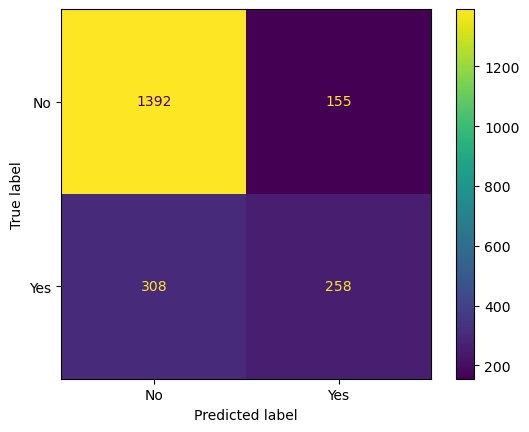

The Kappa of your model is: 0.39

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1547
         Yes       0.62      0.46      0.53       566

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [10]:
print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  
plt.show() 
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print("")
print(classification_report(y_test, predictions))

[[1391  156]
 [ 309  257]]


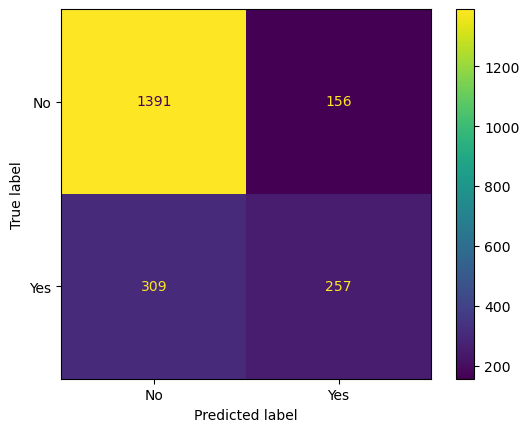

The Kappa of your model is: 0.39

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1547
         Yes       0.62      0.45      0.53       566

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.69      2113
weighted avg       0.77      0.78      0.77      2113



In [11]:
# try without scaling the numerical data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0).fit(X_train, y_train)

predictions = classification.predict(X_test)

print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  
plt.show() 
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print("")
print(classification_report(y_test, predictions))

The result is practically the same. The only difference is that with the scaled data, the recall for "Yes" is slightly better (0.46 vs 0.45).

### 7. Even a simple model will give us more than 70% accuracy. Why?

We are getting a high accuracy because this metric measures the number of correct predictions against the total predictions. However, when there is imbalance in the target like in this case (73% of the "No" class and 27% of the "Yes" class), the accuracy can be high because the model is good at predicting the "No" class, but is it good at predicting the "Yes" class? To know it we have to look at other metrics.

The kappa coefficient takes into account the agreement between the model and the actual observations beyond what would be expected by chance. A kappa coefficient of 0.39 indicates moderate agreement between the model and the actual observations, which suggests that the model is capturing some meaningful patterns in the data, but there is still room for improvement. <br>
Looking at the classification report, we see that the model's performance is not balanced across the two classes, as the "No" class has higher precision, recall, and F1-score than the "Yes" class. <br>
Overall, the classification report suggests that the model may be biased towards predicting the "No" class, which has a higher number of samples. The model may need further tuning and optimization to improve its performance on the "Yes" class and achieve a better balance between precision and recall for both classes.<br>
(Credits to ChatGPT)

To improve the model, we are going to apply 2 different methods to mitigate imbalance: SMOTE and Tomek links.

### 8. Synthetic Minority Oversampling TEchnique (SMOTE)

In [12]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_scaled, y)
y_sm.value_counts()

Churn
No       5174
Yes      5174
dtype: int64

[[1163  394]
 [ 412 1136]]


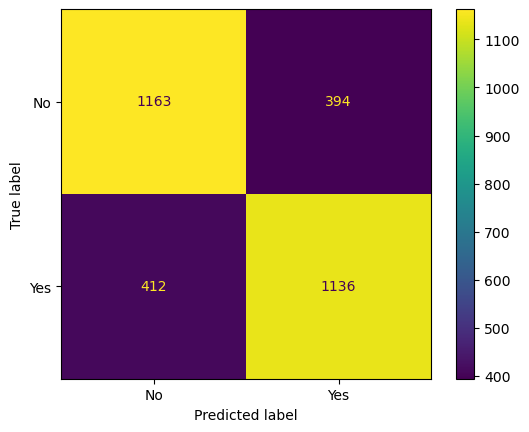

The Kappa of your model is: 0.48

              precision    recall  f1-score   support

          No       0.74      0.75      0.74      1557
         Yes       0.74      0.73      0.74      1548

    accuracy                           0.74      3105
   macro avg       0.74      0.74      0.74      3105
weighted avg       0.74      0.74      0.74      3105



In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0).fit(X_train, y_train)

predictions = classification.predict(X_test)

print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  
plt.show() 
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print("")
print(classification_report(y_test, predictions))

The accuracy is lower (0.74 vs 0.78), however the performance of the model has improved, since we have more balance in the precision, recall and f1-score of the two classes. Also the Kappa has improved.

### 9. Tomek links 

In [14]:
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X_scaled, y)
y_tl.value_counts()

Churn
No       4697
Yes      1869
dtype: int64

[[1284  113]
 [ 273  300]]


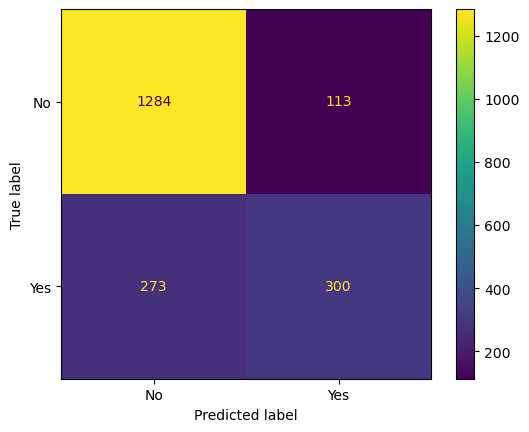

The Kappa of your model is: 0.48

              precision    recall  f1-score   support

          No       0.82      0.92      0.87      1397
         Yes       0.73      0.52      0.61       573

    accuracy                           0.80      1970
   macro avg       0.78      0.72      0.74      1970
weighted avg       0.80      0.80      0.79      1970



In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_tl, y_tl, test_size=0.3, random_state=100)

classification = LogisticRegression(random_state=0).fit(X_train, y_train)

predictions = classification.predict(X_test)

print(confusion_matrix(y_test, predictions))
plot_confusion_matrix(classification, X_test, y_test)  
plt.show() 
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, predictions)))
print("")
print(classification_report(y_test, predictions))

In this case the accuracy has improved (0.8), and also precision, recall and f1-score for "No" are higher. On the other hand, although the metrics for "Yes" have also improved compared to the first model, they are still relatively low.

### 10. Conclusion

In view of the results, I would choose the model with SMOTE, because predicting the "Yes" class is important for the customer churn.